## **⚛️ K-Means - Caso de entrenamiento**

#### **⭕️ Introducción** 

En el análisis de la personalidad en redes sociales, entender los rasgos de carácter de los usuarios es invaluable para psicólogos, empresas y hasta para los propios usuarios. Con la gran cantidad de datos generados en plataformas como Twitter, examinar de manera individual los perfiles de personalidad resulta poco práctico. A través del uso de modelos de machine learning y técnicas de análisis de texto, es posible identificar patrones en la manera en que las personas se expresan que reflejan aspectos de su personalidad. En este caso, se han seleccionado 140 figuras públicas de diversos ámbitos como el deporte, la música y el cine, y se han analizado sus perfiles de Twitter utilizando el modelo de los "Big Five" de la psicología, también conocido como OCEAN. Esta metodología permite clasificar a los individuos en cinco dimensiones de personalidad: Apertura a nuevas experiencias, Responsabilidad, Extraversión, Amabilidad y Neuroticismo. El análisis ofrece una visión más precisa de los rasgos de cada figura pública, generando valor en aplicaciones de marketing, investigación y desarrollo personal.

#### **⭕️ Núcleo Problémico**

El uso de las redes sociales ha transformado la forma en que las personas se comunican, generando grandes volúmenes de datos textuales que contienen valiosa información sobre los usuarios. Sin embargo, este vasto flujo de datos plantea un desafío: identificar y clasificar patrones de lenguaje que reflejen las diferencias en los perfiles de personalidad. La necesidad de segmentar a los usuarios de Twitter según características lingüísticas y de comunicación es crucial para facilitar la identificación de perfiles basados en el modelo de los cinco grandes (OCEAN: apertura a la experiencia, responsabilidad, extraversión, amabilidad y neuroticismo). Esta clasificación no solo ayuda a comprender mejor los comportamientos individuales, sino que también proporciona insights valiosos para el marketing personalizado. Las empresas buscan adaptar sus estrategias y mensajes a las necesidades y preferencias específicas de diferentes segmentos de usuarios. Sin embargo, la precisión en la segmentación y la interpretación de los datos sigue siendo un reto, lo que subraya la necesidad de enfoques más sofisticados en el análisis de datos de redes sociales.

#### **⭕️ Pregunta Problemica** 

¿Cómo puede un modelo de clustering K-Means agrupar a los usuarios de Twitter según patrones de lenguaje y comunicación para identificar perfiles de personalidad basados en el modelo de los cinco grandes (OCEAN), facilitando así insights aplicables en estudios de comportamiento y marketing personalizado?

#### **⭕️ Metodología** 

Para abordar la problemática de segmentar usuarios de Twitter según patrones de lenguaje y comunicación, se puede utilizar el modelo de aprendizaje no supervisado K-Means. La metodología comienza con la recopilación de datos, donde se obtienen tweets y se preprocesan para eliminar ruido, como caracteres especiales y stop words. Luego, se aplica una técnica de representación textual, como la vectorización mediante TF-IDF o embeddings, para convertir los textos en vectores numéricos. A continuación, se determina el número óptimo de clústeres mediante el método del codo, que ayuda a identificar el punto donde la varianza intra-clúster se estabiliza. Una vez establecido el número de clústeres, se ejecuta el algoritmo K-Means, que agrupa los vectores en función de su similitud, minimizando la distancia entre los puntos dentro de cada clúster. Finalmente, se analizan los grupos resultantes para extraer características que permitan identificar perfiles de personalidad basados en el modelo OCEAN, facilitando insights aplicables en estudios de comportamiento y marketing personalizado.

### **⭕️ Entendimiento de los datos**

El conjunto de datos que se utilizará se denomina twitter-users.csv. Este archivo contiene información relevante sobre usuarios de Twitter y sus características de personalidad basadas en el modelo de los cinco grandes (OCEAN). En él se incluyen variables que reflejan distintos aspectos de la personalidad.

| Variable    | Definición                                                 | Descripción                                                              | Valores                        | Tipo de Variable   |
|-------------|-----------------------------------------------------------|-------------------------------------------------------------------------|-------------------------------|--------------------|
| usuario     | Nombre del usuario en Twitter                              | Identificación única del usuario en la plataforma                        | Texto (nombre de usuario)     | Categórica          |
| op          | Openness to experience                                     | Grado de apertura mental a nuevas experiencias y curiosidad              | Escala del 1 al 5             | Numérica (ordinal)  |
| co          | Conscientiousness                                         | Grado de orden, prolijidad y organización                               | Escala del 1 al 5             | Numérica (ordinal)  |
| ex          | Extraversion                                              | Grado de timidez o participación en el grupo social                     | Escala del 1 al 5             | Numérica (ordinal)  |
| ag          | Agreeableness                                             | Grado de empatía y temperamento                                         | Escala del 1 al 5             | Numérica (ordinal)  |
| ne          | Neuroticism                                              | Grado de neuroticismo, nerviosismo e irritabilidad                     | Escala del 1 al 5             | Numérica (ordinal)  |
| Wordcount   | Cantidad promedio de palabras usadas en los tweets        | Promedio de palabras en los tweets del usuario                           | Número entero                  | Numérica (continua) |
| Categoria   | Actividad laboral del usuario                             | Clasificación del usuario según su profesión o actividad                 | Texto (actor, cantante, etc.)  | Categórica          |


### **⭕️ Desarrollo de la Solución**

In [37]:
# Importamos la biblioteca pandas para la manipulación y análisis de datos.
import pandas as pd
# Importamos numpy para operaciones numéricas y manejo de matrices.
import numpy as np
# Importamos matplotlib.pyplot para crear visualizaciones gráficas.
import matplotlib.pyplot as plt
# Importamos seaborn, una biblioteca de visualización basada en matplotlib que facilita la creación de gráficos informativos.
import seaborn as sb
# Importamos KMeans del módulo sklearn.cluster para realizar el agrupamiento de datos.
from sklearn.cluster import KMeans
# Importamos pairwise_distances_argmin_min de sklearn.metrics para calcular la distancia entre los puntos y sus centros de clúster.
from sklearn.metrics import pairwise_distances_argmin_min

from mpl_toolkits.mplot3d import Axes3D
import warnings

# Ignorar advertencias
warnings.filterwarnings("ignore")

In [38]:
# Permite que las visualizaciones de matplotlib se muestren en línea en notebooks de Jupyter.
%matplotlib inline 
# Importamos Axes3D del módulo mpl_toolkits.mplot3d para crear gráficos tridimensionales.
from mpl_toolkits.mplot3d import Axes3D
# Establecemos el tamaño de las figuras de los gráficos en 16x9 pulgadas.
plt.rcParams['figure.figsize'] = (16, 9)
# Usamos el estilo 'ggplot' de matplotlib para dar un aspecto más atractivo a las visualizaciones.
plt.style.use('ggplot')

In [39]:
df = pd.read_csv('../../Datos/twitter-users.csv')
df.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [40]:
df.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [41]:
df['categoria'].value_counts().sort_index()

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
Name: count, dtype: int64

### **⭕️ Caracterización de la variable categoría**

| Categoría | Actividad Laboral | Definición                                            | Cantidad de Registros |
|-----------|-------------------|------------------------------------------------------|-----------------------|
| 1         | Actor/actriz      | Usuario que trabaja en la actuación en cine, teatro, etc. | 27                    |
| 2         | Cantante          | Usuario que se dedica a cantar, ya sea en conciertos, grabaciones, etc. | 34                    |
| 3         | Modelo            | Usuario que trabaja como modelo, participando en desfiles, campañas publicitarias, etc. | 9                     |
| 4         | TV, series        | Usuario que trabaja en televisión, incluyendo presentadores, actores de series, etc. | 19                    |
| 5         | Radio             | Usuario que trabaja en medios de comunicación radial, como locutores o periodistas. | 4                     |
| 6         | Tecnología        | Usuario que se dedica a la innovación y desarrollo en el ámbito tecnológico. | 8                     |
| 7         | Deportes          | Usuario que se dedica profesionalmente o de forma amateur a actividades deportivas. | 17                    |
| 8         | Política          | Usuario que participa en la política, ya sea como político, activista o analista. | 16                    |
| 9         | Escritor          | Usuario que se dedica a escribir, incluyendo autores de libros, artículos, etc. | 6                     |


### **⭕️ Visualización de datos**

Ver graficamente nuestros datos para tener una idea de la dispersión de los mismos

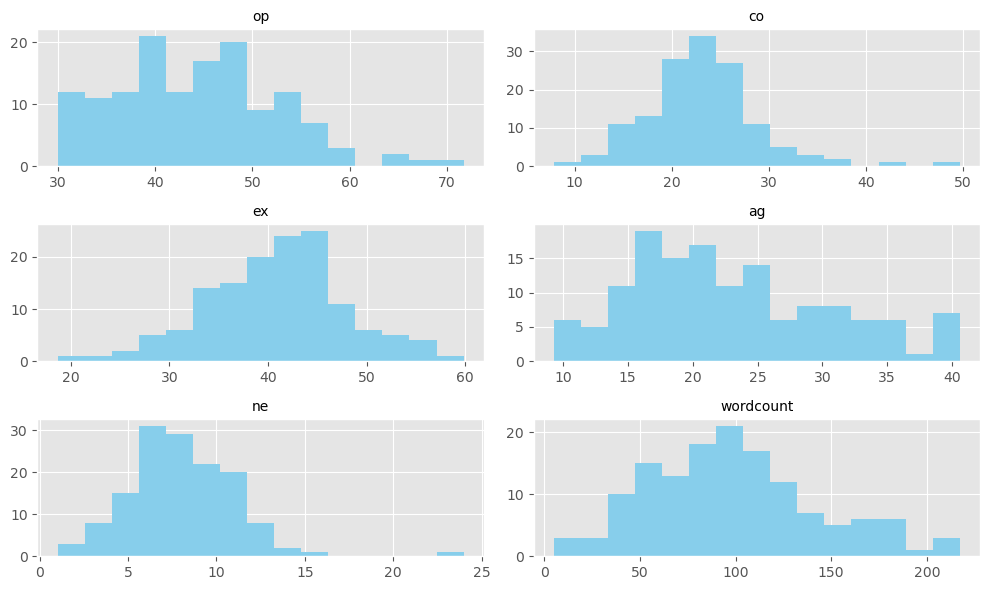

In [42]:
# Eliminamos la columna 'categoria' y creamos un histograma de las demás columnas
axes = df.drop('categoria', axis=1).hist(bins=15, figsize=(10, 6), color='skyblue')  # Cambia 'skyblue' por el color que desees

# Ajustamos el tamaño de los textos del título y de los ejes
for ax in axes.flatten():  # Iteramos sobre todos los ejes
    ax.set_title(ax.get_title(), fontsize=10)  # Cambiar tamaño del título de cada subgráfico
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)  # Cambiar tamaño de la etiqueta del eje X
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Cambiar tamaño de la etiqueta del eje Y

plt.tight_layout()  # Ajusta automáticamente los subgráficos para que se ajuste bien en la figura
plt.show()

En este caso se seleccionan 3 dimensiones: op, ex y ag y las cruzamos para ver si nos dan alguna pista de su agrupación y la relación con sus categorías.

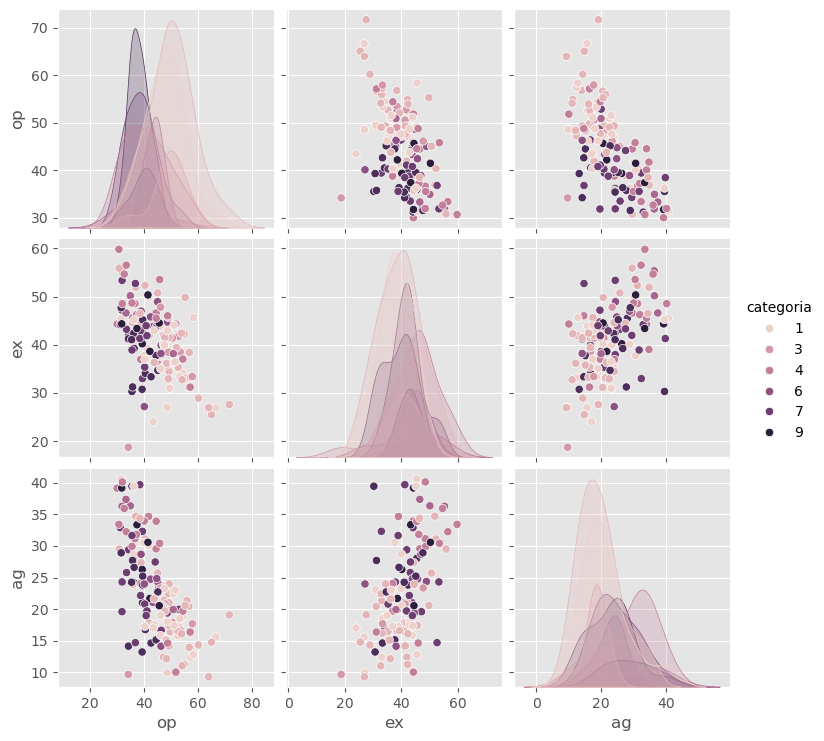

In [43]:
# Creando un pairplot con tamaño más pequeño
sb.pairplot(df.dropna(), hue='categoria', height=2.5, vars=["op", "ex", "ag"], kind='scatter')

In [47]:
# Definimos la estructura de datos para alimentar el algoritmo de clustering.
# En este caso, seleccionamos sólo las columnas 'op', 'ex' y 'ag' del DataFrame df.
# Estas columnas representan las características de apertura a la experiencia, extraversión y amabilidad.
# Guardamos los datos seleccionados en una matriz de NumPy llamada X.
X = np.array(df[["op","ex","ag"]])

# Definimos la variable 'y', que contiene los valores de la columna 'categoria'.
# Esta variable almacenará la categoría a la que pertenece cada usuario en Twitter.
y = np.array(df['categoria'])

# Revisamos la dimensión de la matriz X para asegurarnos de que tiene el formato correcto.
# Esto ayuda a confirmar que los datos están listos para ser utilizados en el algoritmo.
X.shape

(140, 3)

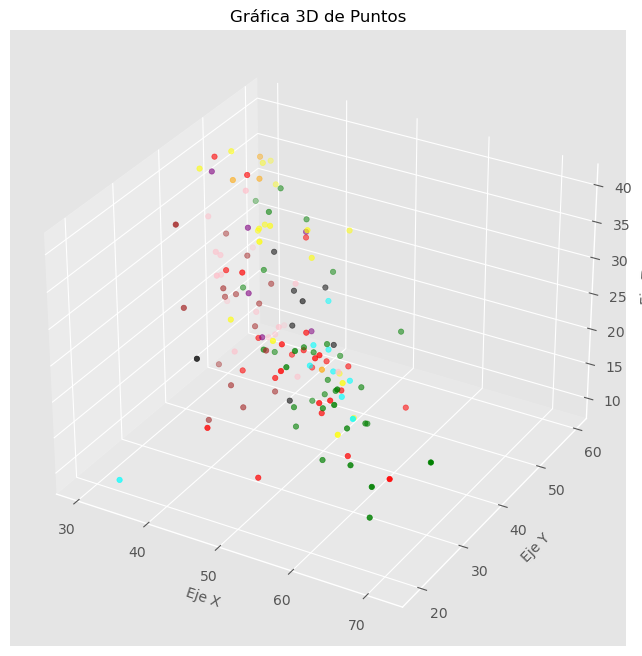

In [82]:
# Crear la figura para la visualización en 3D con un tamaño específico
fig = plt.figure(figsize=(10, 8))  # Especificar el tamaño de la figura para mejor visualización
ax = fig.add_subplot(111, projection='3d')  # Crear un subplot con una proyección 3D

# Definir los colores para representar cada categoría de usuario en la gráfica
colores = ['blue', 'red', 'green', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown', 'purple']
# Asignar un color a cada categoría en 'y' asegurando que el índice esté dentro de la lista de colores
asignar = [colores[row % len(colores)] for row in y]

# Graficar los puntos en 3D usando las tres dimensiones en 'X' y colores asignados
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=15)  # Tamaño de los puntos es 15

# Añadir etiquetas a los ejes y un título para la gráfica
ax.set_xlabel('Eje X', fontsize=10)  # Etiqueta para el eje X con tamaño de fuente 10
ax.set_ylabel('Eje Y', fontsize=10)  # Etiqueta para el eje Y con tamaño de fuente 10
ax.set_zlabel('Eje Z', fontsize=10)  # Etiqueta para el eje Z con tamaño de fuente 10
ax.set_title('Gráfica 3D de Puntos', fontsize=12)  # Título de la gráfica con tamaño de fuente 12

plt.show()  # Mostrar el gráfico en pantalla

### **⭕️ Definición de valor K**

Es posible determinar el valor óptimo de K utilizando una gráfica que represente la relación entre el número de clusters y la métrica de evaluación del modelo, como el score de inercia. Al trazar esta gráfica, se busca identificar el "punto de codo", que es el lugar donde la tasa de mejora en el score comienza a disminuir significativamente. Este punto indica que agregar más clusters no aporta un valor adicional considerable al modelo, lo que sugiere que el número de clusters en ese momento es adecuado para la segmentación de los datos.

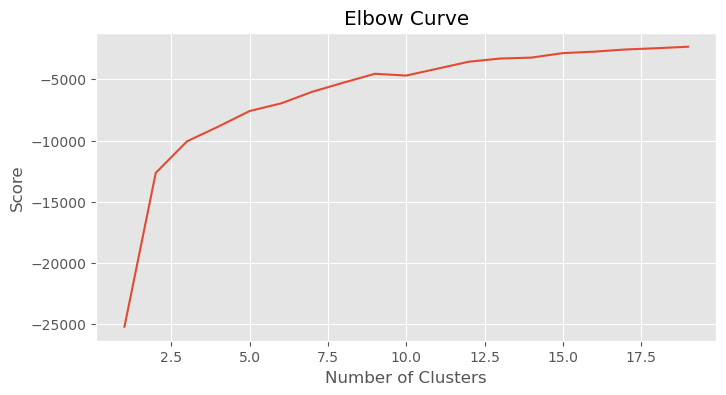

In [83]:
# Definir un rango de posibles valores para el número de clusters a probar
Nc = range(1, 20)  # Evaluar desde 1 hasta 19 clusters

# Crear una lista de modelos KMeans para cada número de clusters en Nc
kmeans = [KMeans(n_clusters=i) for i in Nc]  # Inicializar el modelo KMeans para cada valor de Nc

# Calcular la puntuación (score) para cada modelo KMeans ajustado a los datos X
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]  # Ajustar y obtener la puntuación de cada modelo

# Configurar la figura para la visualización de la curva del codo
plt.figure(figsize=(8, 4))  # Establecer el tamaño de la figura para la gráfica

# Graficar el número de clusters versus la puntuación obtenida
plt.plot(Nc, score)  # Trazar la curva del codo para visualizar el rendimiento de los clusters

# Etiquetas y título para el gráfico
plt.xlabel('Number of Clusters')  # Etiqueta del eje X que indica el número de clusters
plt.ylabel('Score')  # Etiqueta del eje Y que indica la puntuación del modelo
plt.title('Elbow Curve')  # Título de la gráfica que describe su contenido

plt.show()  # Mostrar la gráfica generada en pantalla

La curva presenta una transición gradual, lo que indica que el rendimiento del modelo no muestra cambios drásticos al aumentar el número de clusters. En este contexto, se sugiere que 5 es un valor óptimo para K, ya que proporciona un equilibrio entre la simplicidad del modelo y la capacidad de capturar la variabilidad de los datos.

### **⭕️Inicialización de Centroides**

Ejecutamos el algoritmo para 5 clusters y obtenemos las etiquetas y los centroids.

In [84]:
# Se crea un objeto KMeans con 5 clusters y se ajusta a los datos X.
# Esto implica que el algoritmo KMeans intentará agrupar los datos en 5 grupos distintos.
kmeans = KMeans(n_clusters=5).fit(X)

# Se extraen los centros de los clusters calculados por el modelo KMeans.
# Los centroides representan las posiciones medias de los grupos formados por el algoritmo.
centroids = kmeans.cluster_centers_

# Se imprime la matriz de centroides en la consola.
# Cada fila de esta matriz corresponde a un centro de cluster, y cada columna a una característica.
print(centroids)

[[39.64330308 43.84060941 27.03771349]
 [57.92200861 31.5039735  15.67199517]
 [49.99956234 41.24694574 17.60501824]
 [42.4428538  34.50622228 19.9628938 ]
 [33.98134736 49.445743   34.45634373]]


Ahora en una gráfica 3D con colores lograremos distinguir los grupos y veremos si se diferencian: (las estrellas marcan el centro de cada cluster)

140


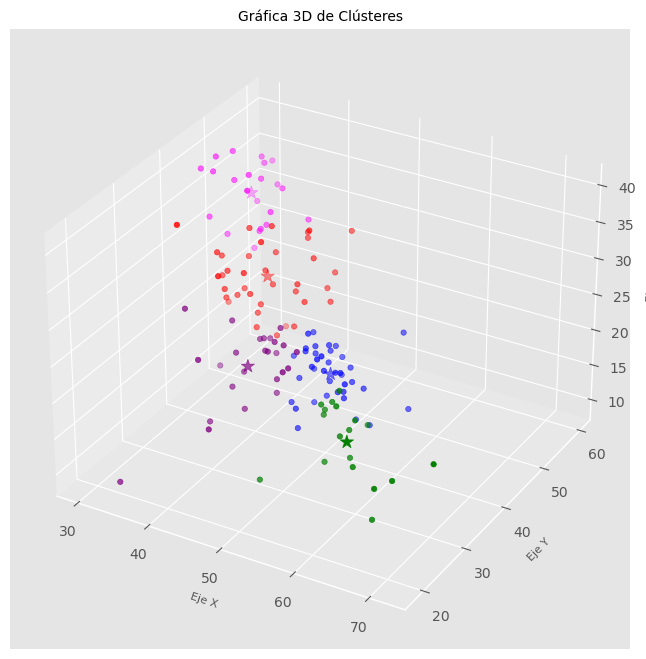

In [85]:
# Ejemplo de datos para X (sustituir con tus datos reales)
# Predecir los clusters utilizando el modelo KMeans previamente ajustado.
labels = kmeans.predict(X)

# Obtener los centros de los clusters calculados por el modelo KMeans.
C = kmeans.cluster_centers_

# Definir colores para representar las diferentes categorías de clusters.
colores = ['red', 'green', 'blue', 'purple', 'magenta']
asignar = []  # Lista para asignar colores a cada punto según su cluster

# Iterar sobre las etiquetas de los clusters y asignar colores a cada punto.
for row in labels:
    asignar.append(colores[row])

# Imprimir el número total de puntos en la lista 'asignar' para verificar la longitud.
print(len(asignar))

# Crear una figura y un eje para el gráfico 3D.
fig = plt.figure(figsize=(8, 10))  # Especificar el tamaño de la figura
ax = fig.add_subplot(111, projection='3d')  # Crear un subplot 3D

# Graficar los puntos en el espacio 3D, coloreándolos según su cluster.
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=15)  # Tamaño de los puntos reducido a 15

# Graficar los centros de los clusters, utilizando un marcador diferente ('*') para destacarlos.
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=100)  # Tamaño de las estrellas reducido a 100

# Etiquetar los ejes y establecer un título para el gráfico.
ax.set_xlabel('Eje X', fontsize=8)
ax.set_ylabel('Eje Y', fontsize=8)
ax.set_zlabel('Eje Z', fontsize=8)
ax.set_title('Gráfica 3D de Clústeres', fontsize=10)

# Mostrar el gráfico resultante en una ventana.
plt.show()  # Mostrar el gráfico

Aqui podemos ver que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios Twitter por su personalidad, teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. 

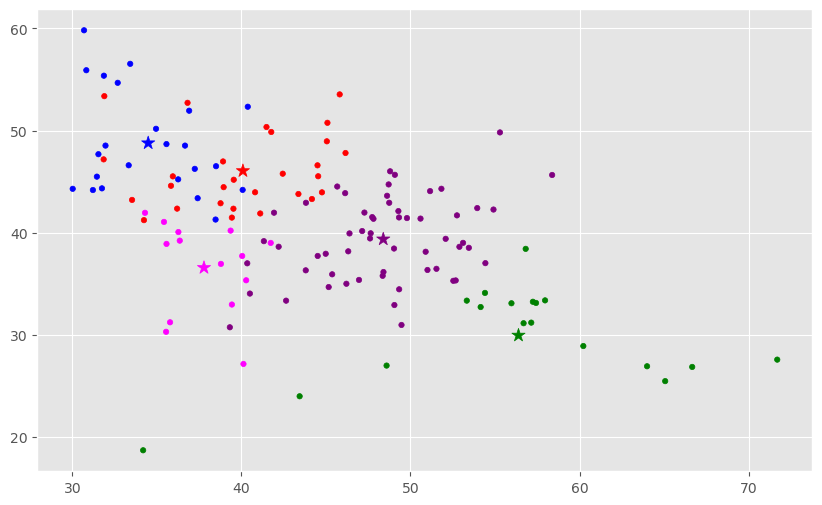

In [59]:
# Obtener los valores de las columnas 'op' y 'ex' del DataFrame
f1 = df['op'].values  # Almacenar los valores de la columna 'op' en f1
f2 = df['ex'].values  # Almacenar los valores de la columna 'ex' en f2

# Crear una figura para el gráfico, especificando su tamaño
fig = plt.figure(figsize=(10, 6))  # Especificar el tamaño de la figura (10x6 pulgadas)
ax = fig.add_subplot(111)  # Crear un subplot 2D

# Graficar los puntos en un gráfico de dispersión, utilizando 'f1' y 'f2' como coordenadas
plt.scatter(f1, f2, c=asignar, s=15)  # 'asignar' define los colores de los puntos, tamaño de los puntos es 15

# Graficar los centros de los clusters, utilizando un marcador de estrella ('*') para destacarlos
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=100)  # Tamaño de las estrellas es 100

# Mostrar el gráfico en una ventana
plt.show()  # Mostrar el gráfico

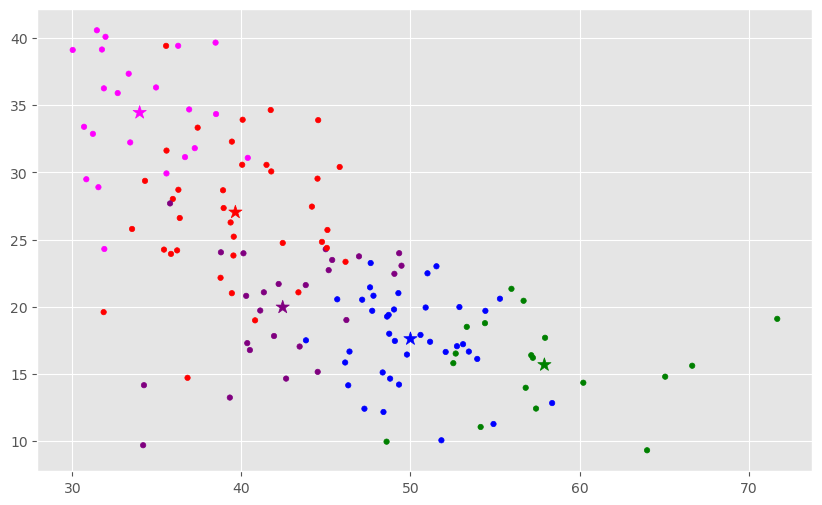

In [86]:
# Obtener los valores de las columnas 'op' y 'ag' del DataFrame
f1 = df['op'].values  # Almacenar los valores de la columna 'op' en f1
f2 = df['ag'].values  # Almacenar los valores de la columna 'ag' en f2

# Crear una figura para el gráfico, especificando su tamaño
fig = plt.figure(figsize=(10, 6))  # Especificar el tamaño de la figura (10x6 pulgadas)
ax = fig.add_subplot(111)  # Crear un subplot 2D

# Graficar los puntos en un gráfico de dispersión, utilizando 'f1' y 'f2' como coordenadas
ax.scatter(f1, f2, c=asignar, s=15)  # 'asignar' define los colores de los puntos, tamaño de los puntos es 15

# Graficar los centros de los clusters, utilizando un marcador de estrella ('*') para destacarlos
ax.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=100)  # Tamaño de las estrellas es 100, se grafican con f1 y la tercera dimensión de los centroides

# Mostrar el gráfico en una ventana
plt.show()  # Mostrar el gráfico

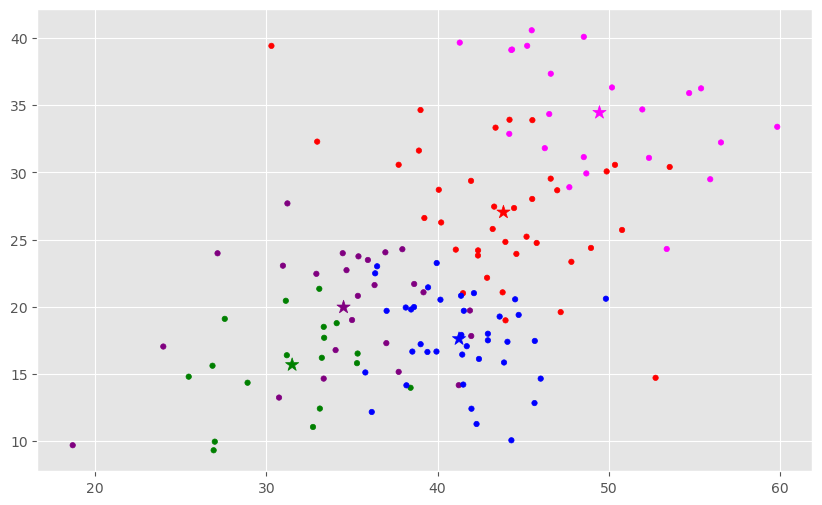

In [87]:
# Obtener los valores de las columnas 'ex' y 'ag' del DataFrame
f1 = df['ex'].values  # Almacenar los valores de la columna 'ex' en f1
f2 = df['ag'].values  # Almacenar los valores de la columna 'ag' en f2

# Crear una figura para el gráfico, especificando su tamaño
fig = plt.figure(figsize=(10, 6))  # Especificar el tamaño de la figura (10x6 pulgadas)
ax = fig.add_subplot(111)  # Crear un subplot 2D

# Graficar los puntos en un gráfico de dispersión, utilizando 'f1' y 'f2' como coordenadas
ax.scatter(f1, f2, c=asignar, s=15)  # 'asignar' define los colores de los puntos, tamaño de los puntos es 15

# Graficar los centros de los clusters, utilizando un marcador de estrella ('*') para destacarlos
ax.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=100)  # Tamaño de las estrellas es 100, se grafican con 'f1' y la segunda y tercera dimensión de los centroides

# Mostrar el gráfico en una ventana
plt.show()  # Mostrar el gráfico

In [88]:
# Crear un nuevo DataFrame 'copy' que contendrá columnas seleccionadas del DataFrame original
copy = pd.DataFrame()  # Inicializar un nuevo DataFrame vacío
copy['usuario'] = df['usuario'].values  # Copiar la columna 'usuario' del DataFrame original
copy['categoria'] = df['categoria'].values  # Copiar la columna 'categoria' del DataFrame original
copy['label'] = labels  # Añadir la columna 'label', que contiene las etiquetas de los clusters

# Crear un segundo DataFrame 'cantidadGrupo' para almacenar la cantidad de usuarios por grupo
cantidadGrupo = pd.DataFrame()  # Inicializar un nuevo DataFrame vacío
cantidadGrupo['color'] = colores  # Asignar la lista de colores a la columna 'color'
cantidadGrupo['cantidad'] = copy.groupby('label').size()  # Agrupar el DataFrame 'copy' por 'label' y contar el número de elementos en cada grupo

# Mostrar el DataFrame que contiene la cantidad de usuarios por grupo y sus colores asociados
cantidadGrupo  # Mostrar el DataFrame 'cantidadGrupo'

,color,cantidad
0,red,37
1,green,18
2,blue,38
3,purple,25
4,magenta,22


Se puede ver la diversidad en rubros laborales de cada uno. Por ejemplo en el grupo 3 (purple), vemos que hay de todas las actividades laborales aunque predominan de actividad 7 y 8 correspondiente a Deportes y Politica con 8 y 6 famosos.

In [89]:
# Filtrar el DataFrame 'copy' para obtener solo las filas donde 'label' es igual a 0
group_referrer_index = copy['label'] == 0  # Crear un índice booleano para identificar el grupo con 'label' igual a 0
group_referrals = copy[group_referrer_index]  # Aplicar el índice para obtener solo las filas del grupo seleccionado

# Crear un nuevo DataFrame 'diversidadGrupo' para contar la cantidad de referencias por categoría
diversidadGrupo = pd.DataFrame()  # Inicializar un nuevo DataFrame vacío
diversidadGrupo['categoria'] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Definir la columna 'categoria' con valores del 0 al 9
diversidadGrupo['cantidad'] = group_referrals.groupby('categoria').size()  # Agrupar 'group_referrals' por 'categoria' y contar el número de elementos en cada grupo

# Mostrar el DataFrame que contiene la cantidad de referencias por categoría para el grupo filtrado
diversidadGrupo  # Mostrar el DataFrame 'diversidadGrupo'

,categoria,cantidad
0,0,NaN
1,1,3.0
2,2,3.0
3,3,1.0
4,4,5.0
5,5,NaN
6,6,5.0
7,7,9.0
8,8,8.0
9,9,3.0


Este código permite analizar la diversidad de categorías entre los usuarios que pertenecen al grupo identificado con `label` igual a 0. Filtra el DataFrame `copy` para seleccionar solo esos usuarios y luego crea un nuevo DataFrame que cuenta cuántos usuarios hay en cada categoría, lo que proporciona una visión de la composición del grupo en términos de sus categor

### **⭕️Analisis de Centroides**

El análisis de centroides permite identificar agrupaciones en las actividades laborales de los usuarios, basándose en las variables `Cantidad`, `Cantidad Nueva` y `Promedio`. Mediante K-Means, normalizamos los datos y asignamos categorías a clústeres según su proximidad a los centroides. Este enfoque revela similitudes entre actividades, destacando patrones como niveles de popularidad y posibles perfiles de influencia en la plataforma. Así, actividades como “Cantante” y “Actor/actriz” podrían agruparse en un clúster de alta visibilidad, mientras que “Radio” y “Escritor” reflejan una menor presencia.

| Categoria | Actividad Laboral | Cantidad | Cantidad Nueva | Promedio |
|-----------|-------------------|----------|----------------|----------|
| 0         | -                | 0        | 0              | 0.0      |
| 1         | Actor/actriz     | 1        | 27             | 14.0     |
| 2         | Cantante         | 3        | 34             | 18.5     |
| 3         | Modelo           | 1        | 9              | 5.0      |
| 4         | TV, series       | 3        | 19             | 11.0     |
| 5         | Radio            | 0        | 4              | 4.0      |
| 6         | Tecnología       | 5        | 8              | 6.5      |
| 7         | Deportes         | 8        | 17             | 12.5     |
| 8         | Política         | 6        | 16             | 11.0     |
| 9         | Escritor         | 1        | 6              |3.5      |


Buscando los usuarios que están más cerca a los centroids de cada grupo que podríamos decir que tienen los rasgos de personalidad característicos que representan a cada cluster:

In [70]:
# Calcular las posiciones más cercanas de los centros de los clústeres a los puntos de datos en X
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)  
# 'closest' contiene los índices de los puntos de datos más cercanos a cada centro de clúster.

# Mostrar las posiciones en el array de usuarios que están más cerca de los centros de los clústeres
closest  # Mostrar el array 'closest' que indica las posiciones de los usuarios más cercanos a los centros

array([107,  82,  35,  29,  43], dtype=int64)

In [90]:
# Extraer las columnas 'usuario' y 'categoria' del DataFrame 'df' y almacenarlas en una matriz 'users'
users = df[['usuario', 'categoria']].values  

# Iterar a través de los índices de los usuarios más cercanos a los centros de clúster
for row in closest:
    # Imprimir la información del usuario correspondiente al índice actual en 'closest'
    print(users[row])  # Muestra el usuario y su categoría que están más cerca de cada centro de clúster

['Pablo_Iglesias_' 8]
['JudgeJudy' 4]
['DaniMateoAgain' 5]
['CindyCrawford' 3]
['EdwardNorton' 1]


En los centros vemos que tenemos una modelo, un político, presentadora de Tv, locutor de Radio, una modelo y un actor.

In [81]:
# Crear un nuevo array 'X_new' con las características del usuario 3gerardpique
X_new = np.array([[34.29, 41.94, 29.37]])  # Representa las características en un formato adecuado para el modelo

# Utilizar el modelo KMeans para predecir a qué clúster pertenece el nuevo usuario basado en sus características
new_labels = kmeans.predict(X_new)

# Imprimir la etiqueta del clúster al que se ha asignado el nuevo usuario
print(new_labels)  # Muestra la etiqueta del clúster que representa el grupo al que pertenece 'davidguetta'

[4]


Y finalmente podemos agrupar y etiquetar nuevos usuarios twitter con sus características y clasificarlos. Vemos el ejemplo con el usuario de 3gerardpique y nos devuelve que pertenece al grupo 4 (Magenta).